In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (60000, 28, 28)
Y_train shape  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


In [4]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)
Y = keras.utils.to_categorical(Y)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 8)


In [6]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [7]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (49000, 784)
Y_train shape  (49000, 10)
X_test shape:  (21000, 784)
Y_test shape:  (21000, 10)


In [8]:
#MLP
def get_mlp_model():
  temp = keras.models.Sequential([
                    # keras.layers.Flatten(),
                    keras.layers.Dense(units=256, activation="relu", input_shape=(784,)),
                    keras.layers.Dense(units=256, activation="relu"),
                    keras.layers.Dense(units=10,activation="softmax")
  ])
  return temp

In [ ]:
mlp_model = get_mlp_model()

In [ ]:
mlp_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


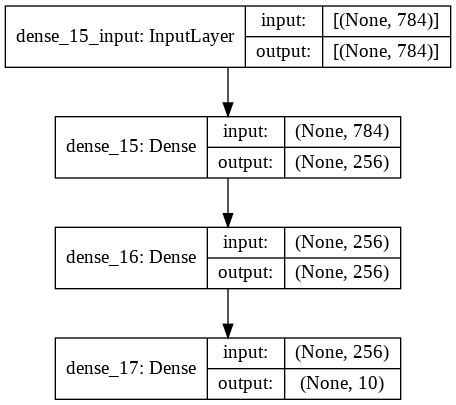

In [ ]:
keras.utils.plot_model(mlp_model, show_shapes=True)

In [9]:
### LR Schedulers with exponential annealing

lr_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=10000,decay_rate=0.9)

In [ ]:
###Optimizers:


In [ ]:
#Adam

adamopm = keras.optimizers.Adam(learning_rate=lr_scheduler)
mlp_model = get_mlp_model()
mlp_model.compile(optimizer=adamopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1151 - accuracy: 0.9742
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0927 - accuracy: 0.9769
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0874 - accuracy: 0.9781
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0800 - accuracy: 0.9813
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9822
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.9828
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0610 - accuracy: 0.9858
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0565 - accuracy: 0.9857
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0529 - accuracy: 0.9869
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.049

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9646


[0.1736893653869629, 0.9646190404891968]

Text(0.5, 0, 'epoch')

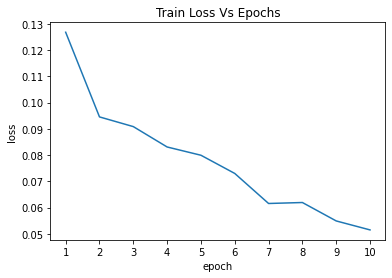

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
###RMSProp

rmsopm = keras.optimizers.RMSprop(learning_rate=lr_scheduler)
mlp_model = get_mlp_model()
mlp_model.compile(optimizer=rmsopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 5s 3ms/step - loss: 6.1155 - accuracy: 0.8287
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.4489 - accuracy: 0.9218
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.3471 - accuracy: 0.9429
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.3129 - accuracy: 0.9497
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2934 - accuracy: 0.9544
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.3186 - accuracy: 0.9546
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2667 - accuracy: 0.9601
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.9635
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2581 - accuracy: 0.9626
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.274

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.6636 - accuracy: 0.9610


[0.6636000275611877, 0.9610475897789001]

Text(0.5, 0, 'epoch')

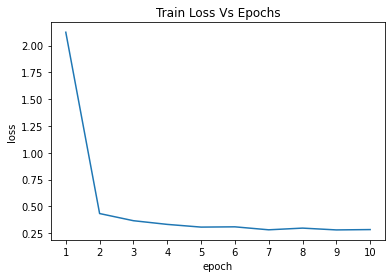

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
### SGD without Momentum:

sgdopm = keras.optimizers.SGD(learning_rate=lr_scheduler)
mlp_model = get_mlp_model()
mlp_model.compile(optimizer=sgdopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 2ms/step - loss: 4.6727 - accuracy: 0.8260
Epoch 2/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.9415
Epoch 3/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9617
Epoch 4/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0917 - accuracy: 0.9740
Epoch 5/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9826
Epoch 6/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 7/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9938
Epoch 8/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0157 - accuracy: 0.9959
Epoch 9/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0107 - accuracy: 0.9977
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.007

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9540


[0.2844833731651306, 0.9539523720741272]

Text(0.5, 0, 'epoch')

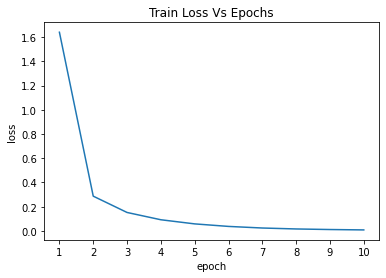

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
### SGD with Momentum:

sgdopm = keras.optimizers.SGD(learning_rate=lr_scheduler,momentum=0.9)
mlp_model = get_mlp_model()
mlp_model.compile(optimizer=sgdopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 3ms/step - loss: 6.9131 - accuracy: 0.7081
Epoch 2/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.9100
Epoch 3/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9280
Epoch 4/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.2384 - accuracy: 0.9377
Epoch 5/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1932 - accuracy: 0.9482
Epoch 6/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1786 - accuracy: 0.9520
Epoch 7/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1665 - accuracy: 0.9553
Epoch 8/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1501 - accuracy: 0.9587
Epoch 9/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1386 - accuracy: 0.9618
Epoch 10/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.136

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9532


[0.20018282532691956, 0.9532380700111389]

Text(0.5, 0, 'epoch')

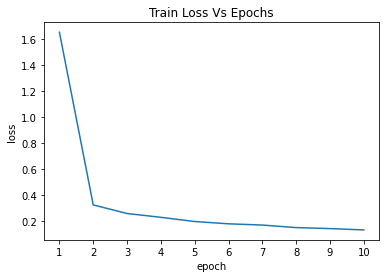

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
###Wight Initializers:

def get_mlp_model_weight(kinit):
  temp = keras.models.Sequential([
                    # keras.layers.Flatten(),
                    keras.layers.Dense(units=256, kernel_initializer= kinit,activation="relu", input_shape=(784,)),
                    keras.layers.Dense(units=256, activation="relu"),
                    keras.layers.Dense(units=10,activation="softmax")
  ])
  return temp

In [ ]:


##Xavier Weight Initializer

sgdopm = keras.optimizers.SGD(learning_rate=lr_scheduler)
init_xav = keras.initializers.GlorotNormal()
mlp_model = get_mlp_model_weight(init_xav)
mlp_model.compile(optimizer=sgdopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 2ms/step - loss: 5.5216 - accuracy: 0.8199
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2775 - accuracy: 0.9366
Epoch 3/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.1583 - accuracy: 0.9581
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1001 - accuracy: 0.9710
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0713 - accuracy: 0.9784
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0499 - accuracy: 0.9858
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0364 - accuracy: 0.9889
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0272 - accuracy: 0.9928
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0202 - accuracy: 0.9945
Epoch 10/10
1532/1532 [==============================] - 4s 2ms/step - loss: 0.015

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.9522


[0.2651446461677551, 0.9521904587745667]

Text(0.5, 0, 'epoch')

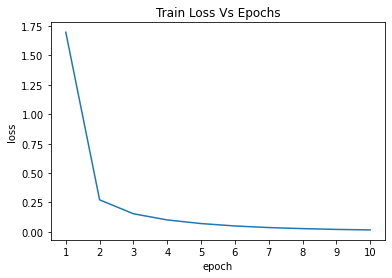

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#Normal Initializer:

adamopm = keras.optimizers.Adam(learning_rate=lr_scheduler)
init_norm = keras.initializers.RandomNormal(seed=2)
mlp_model = get_mlp_model_weight(init_norm)
mlp_model.compile(optimizer=adamopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 3ms/step - loss: 6.3284 - accuracy: 0.8377
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.4217 - accuracy: 0.9344
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1794 - accuracy: 0.9532
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1473 - accuracy: 0.9592
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1438 - accuracy: 0.9605
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1270 - accuracy: 0.9634
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1161 - accuracy: 0.9675
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1023 - accuracy: 0.9716
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0963 - accuracy: 0.9739
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.078

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1947 - accuracy: 0.9592


[0.19474239647388458, 0.9591904878616333]

Text(0.5, 0, 'epoch')

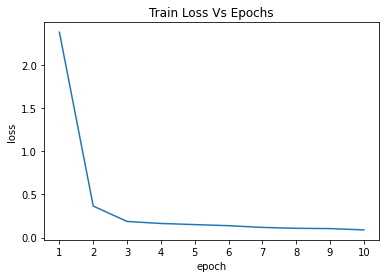

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:

#Uniform Initializer:

adamopm = keras.optimizers.Adam(learning_rate=lr_scheduler)
init_uni = keras.initializers.RandomUniform(seed=2)
mlp_model = get_mlp_model_weight(init_uni)
mlp_model.compile(optimizer=adamopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 3ms/step - loss: 3.1015 - accuracy: 0.8392
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.2596 - accuracy: 0.9391
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1641 - accuracy: 0.9561
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1462 - accuracy: 0.9594
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1344 - accuracy: 0.9608
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1235 - accuracy: 0.9665
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1110 - accuracy: 0.9691
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0941 - accuracy: 0.9736
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9750
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.076

In [ ]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9566


[0.19429101049900055, 0.9566190242767334]

Text(0.5, 0, 'epoch')

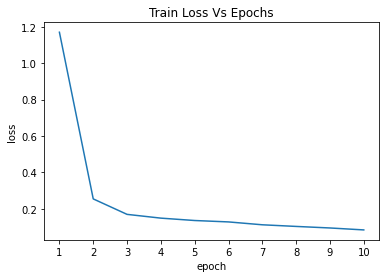

In [ ]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')

In [44]:
###AutoEncoder

def get_mlp():
  temp = keras.models.Sequential([
                    # keras.layers.Flatten(),
                    keras.layers.Dense(units=256, activation="relu", input_shape=(64,)),
                    keras.layers.Dense(units=256, activation="relu"),
                    keras.layers.Dense(units=10,activation="softmax")
  ])
  return temp

In [36]:
#AutoEncoder Class
class Autoencoder(keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = keras.Sequential([
      keras.layers.Dense(512),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(256),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(latent_dim,activation="sigmoid")
    ])
    self.decoder = keras.Sequential([
      keras.layers.Dense(128),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(256),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(512),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(784,activation = "sigmoid")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    print(encoded.shape)
    decoded = self.decoder(encoded)
    print(decoded.shape)
    return decoded


In [37]:
latent_dim = 64

In [40]:
autoencoder = Autoencoder(latent_dim=latent_dim)
rmsopm = keras.optimizers.RMSprop(learning_rate=0.00000001)
autoencoder.compile(rmsopm, loss="binary_crossentropy")

In [41]:
autoencoder.fit(X_train, X_train, batch_size=32, epochs=10)

Epoch 1/10
(None, 64)
(None, 784)
(None, 64)
(None, 784)
1532/1532 [==============================] - 35s 22ms/step - loss: 0.4597
Epoch 2/10
1532/1532 [==============================] - 32s 21ms/step - loss: 0.4315
Epoch 3/10
1532/1532 [==============================] - 34s 22ms/step - loss: 0.3778
Epoch 4/10
1532/1532 [==============================] - 33s 22ms/step - loss: 0.3374
Epoch 5/10
1532/1532 [==============================] - 32s 21ms/step - loss: 0.3098
Epoch 6/10
1532/1532 [==============================] - 33s 22ms/step - loss: 0.2628
Epoch 7/10
1532/1532 [==============================] - 33s 21ms/step - loss: 0.2056
Epoch 8/10
1532/1532 [==============================] - 34s 22ms/step - loss: 0.1683
Epoch 9/10
1532/1532 [==============================] - 34s 22ms/step - loss: 0.1309
Epoch 10/10
1532/1532 [==============================] - 33s 21ms/step - loss: 0.0891


In [42]:
X_test_en = autoencoder.encoder(X_test).numpy()
X_train_en = autoencoder.encoder(X_train).numpy()


In [22]:
X_train_en.shape

(49000, 32)

In [45]:
mlp_model = get_mlp()
mlp_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
mlphist1 = mlp_model.fit(X_train_en, Y_train, batch_size=32, epochs=10, validation_data=(X_test_en, Y_test))

Epoch 1/10
1532/1532 [==============================] - 5s 3ms/step - loss: 1.2371 - accuracy: 0.5892 - val_loss: 0.8760 - val_accuracy: 0.7042
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.8197 - accuracy: 0.7244 - val_loss: 0.7792 - val_accuracy: 0.7384
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.7325 - accuracy: 0.7513 - val_loss: 0.7419 - val_accuracy: 0.7514
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.6721 - accuracy: 0.7742 - val_loss: 0.7315 - val_accuracy: 0.7530
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.6312 - accuracy: 0.7870 - val_loss: 0.7106 - val_accuracy: 0.7632
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.6061 - accuracy: 0.7956 - val_loss: 0.6988 - val_accuracy: 0.7666
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.5731 - accuracy: 0.8053 - val_loss: 0.6914 - val_accuracy:

In [47]:
mlp_model.evaluate(X_test_en,Y_test,batch_size=32)

657/657 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.7747


[0.6952499747276306, 0.7746666669845581]

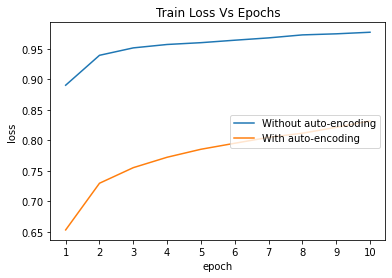

In [48]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['accuracy'])
plt.plot(x_axis,mlphist1.history["accuracy"])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Without auto-encoding', 'With auto-encoding'], loc='center right')